### Author: Rajesh Kumar Singh

## Project: – Logistic Regression Project

#### Project Description:


#### Objective:

In this Project, ”Pima Indians Diabetes” dataset will be used to build a Logistic Regression model to predict whether a person is likely to develop diabetes or not.

#### Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content:

The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Inspiration:

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

DATASET: pima-indians-diabetes

Apply the concepts and techniques you have learnt in the previous weeks and summarise your insights at the end.

#### Expectations:

1. Univariate analysis
2. Multivariate analysis
3. A good strategy to address the presence outliers and missing values
4. Target Column Distribution
5. Load the data into a data-frame. 
6. Ensure the attribute types are correct. If not, take appropriate actions.
7. Transform the data i.e. scale / normalize if required
8. Create the training set and test set in the appropriate ratio
9. First create Logistic Regression algorithm
10. Check the model performance
11. Print the accuracy of the model & confusion Matrix
12. Explain Precision, Recall value & F1 Score using the classification report
13. Write your final observation and conclusion

#### Features of the Dataset:

1. Title: pima-indians-diabetes

2. Sources:National Institute of Diabetes and Digestive and Kidney Diseases.
     
3. Attribute Details :
The following features have been provided to help us predict whether a person is diabetic or not:
  1. Pregnancies: Number of times pregnant
  2. Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
  3. BloodPressure: Diastolic blood pressure (mm Hg)
  4. SkinThickness: Triceps skin fold thickness (mm)
  5. Insulin: 2-Hour serum insulin (mu U/ml)
  6. BMI: Body mass index (weight in kg/(height in m)2)
  7. DPF: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
  8. Age: Age (years)
  9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic)
  
  The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)
  

5. Number of Instances: 767

6. Number of Attributes: 9 including the class attribute

### Project Execution Details

#### Imports and configuration

In [123]:
#Data Preprosessing

#Importing the necessary libraries to do the above project
import numpy as np    #----is a library to do mathematical calculation
from matplotlib import pyplot as plt  #-----is a library to plot nice chart
import pandas as pd  #----is a library to import and manage dataset
import seaborn as sns    #----is a library for making statistical graphics on top of matplotlib. 
import warnings;

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

#import sys #only needed to determine Python version number
#import matplotlib #only needed to determine Matplotlib version number

#print('Python version ' + sys.version)
#print('Pandas version ' + pd.__version__)
#print('Matplotlib version ' + matplotlib.__version__)

#### Load the dataset

In [124]:
#Importing the dataset
ds_location = r'C:\Users\eyacdel\Documents\Total DataScience\Logistic Regression\pima-indians-diabetes.csv'

#Loading the dataset
dataSet = pd.read_csv(ds_location)

#### Inspect the Dataset

In [80]:
#dataSet.Outcome.count()
dataSet.count()

Pregnancies      768
Glucose          768
BloodPressure    768
SkinThickness    768
Insulin          768
BMI              768
DPF              768
Age              768
Outcome          768
dtype: int64

#### Performing basic EDA on the data

In [64]:
#Simple data display operations on above dataset 
#dataSet.head()
#dataSet.tail()
#dataSet.count()
#dataSet.dtypes
#dataSet.shape

##### Let's make sure that our data is clean (has no null values, etc).

In [47]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
DPF              768 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
#Missing Data Identification in dataset
#Column wise missing value count
dataSet.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [68]:
#total missing value count in dataset
dataSet.isnull().sum().sum()

0

In [50]:
dataSet.isnull().values.any() # Checking for null values in data set

False

In [51]:
dataSet.isnull().any()

Pregnancies      False
Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
DPF              False
Age              False
Outcome          False
dtype: bool

In [73]:
#print(dataSet.head())
#print(dataSet.index)
print(dataSet.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')


In [134]:
dataSet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visualise the Dataset

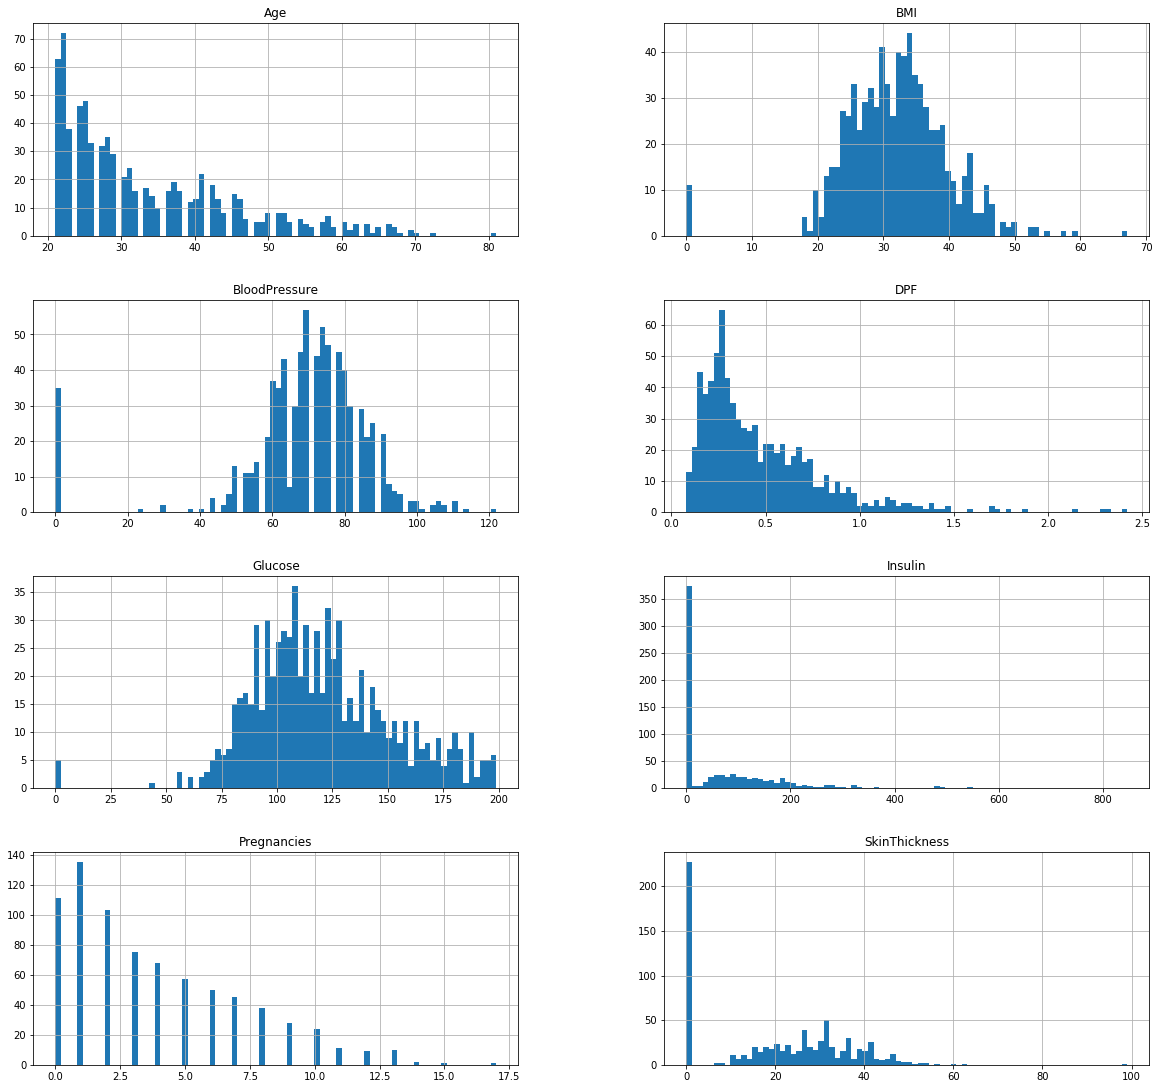

In [135]:
# Plotting the Histogram of first 8 columns

columns = list(dataSet)[0:-1] # Excluding Outcome column which has only 
dataSet[columns].hist(bins=80, figsize=(20,70), layout=(14,2)); 

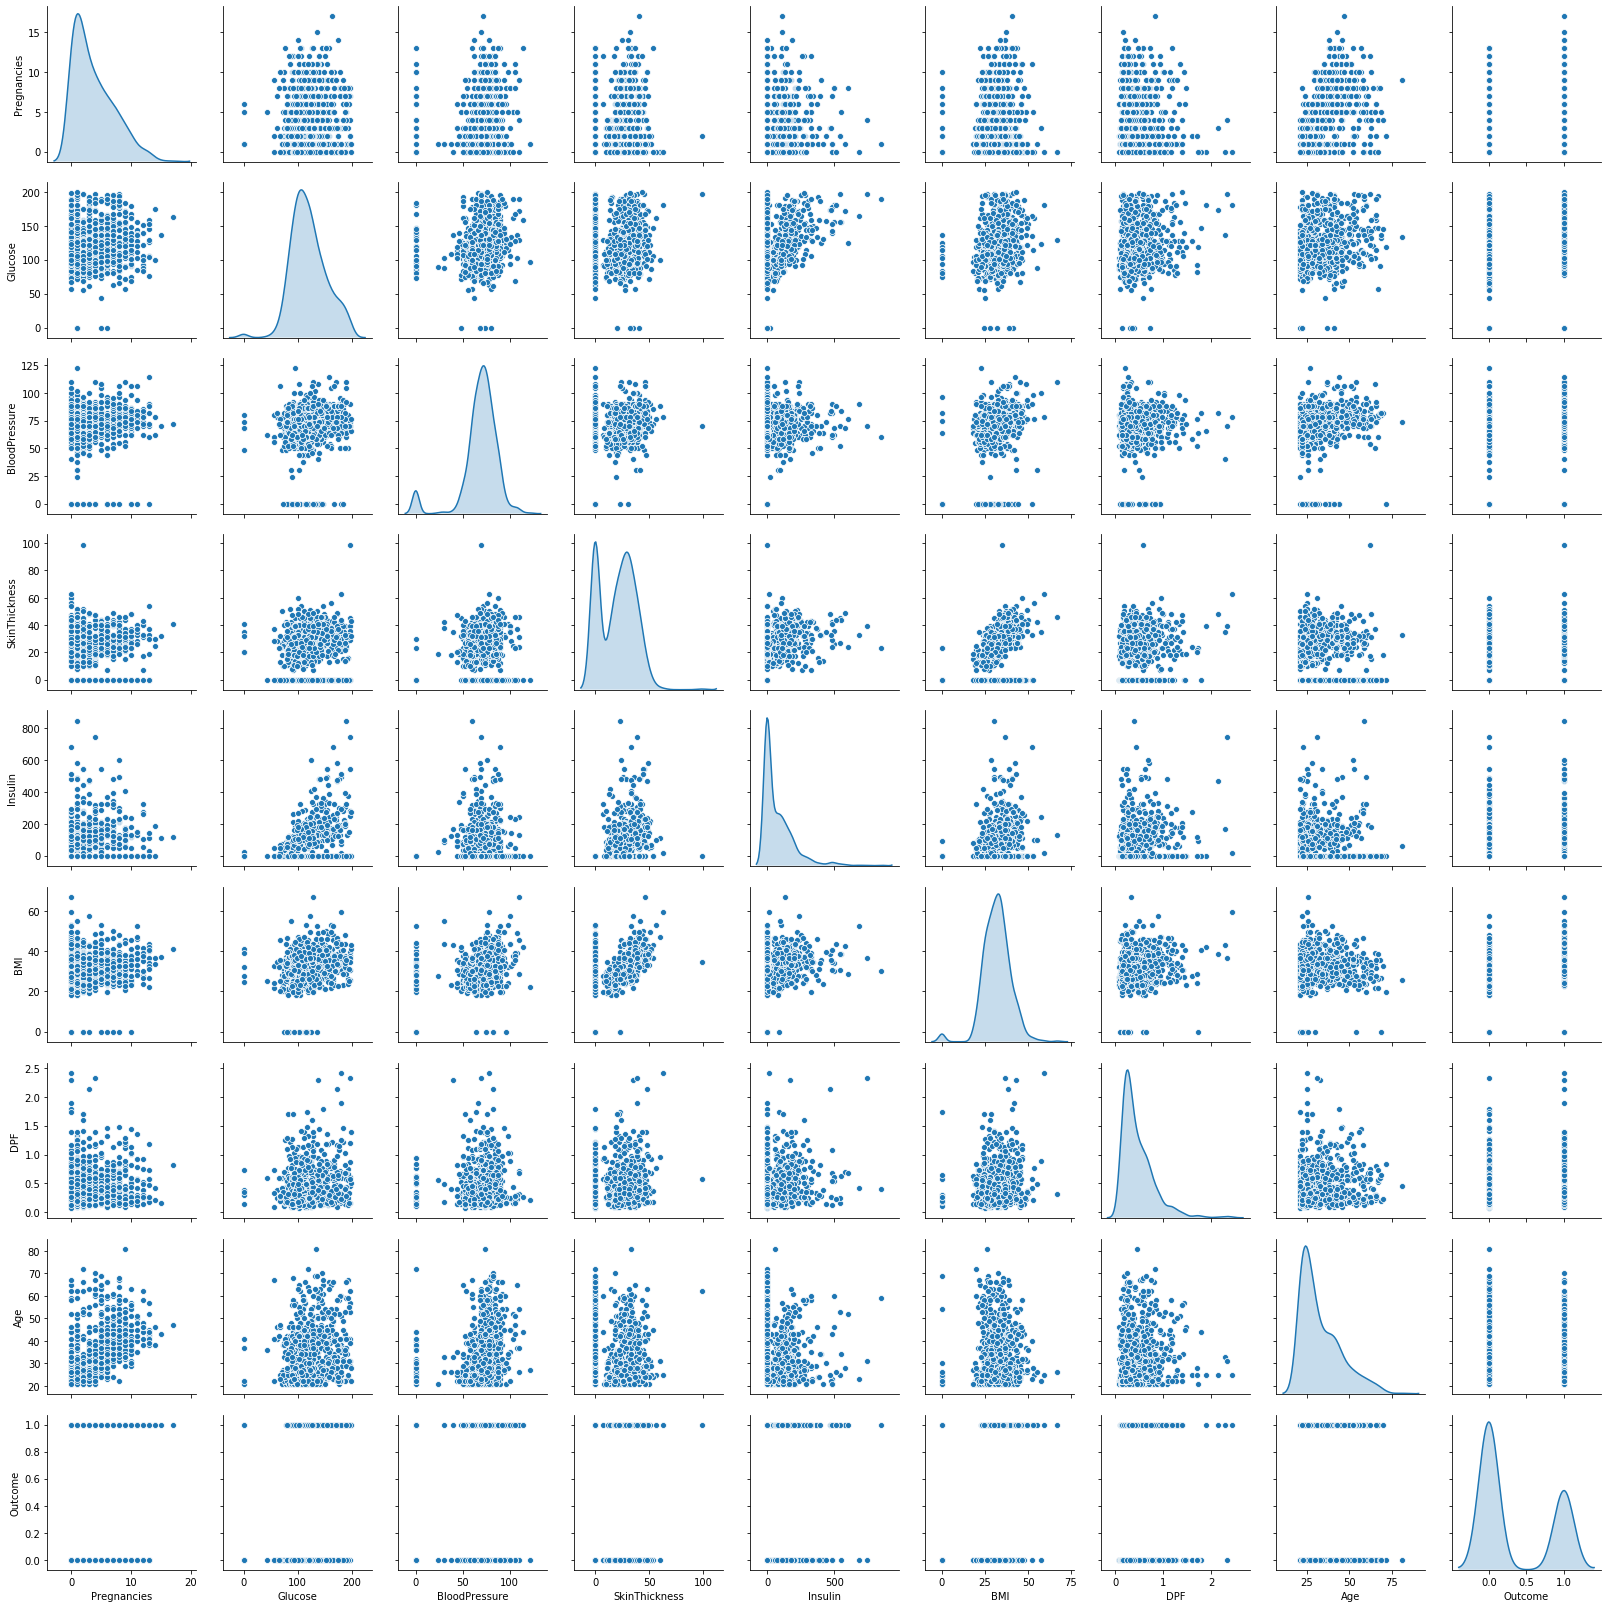

In [137]:
#Also, we can view that using a pairplot as below.
# Viewing the pairplot
sns.pairplot(dataSet,diag_kind='kde')

### Data Exploration

#### Data correlation matrix
The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

##### finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

In [55]:
# Trying to detect correlation in the data
corr = dataSet.corr() # It will show the correlation matrix 
print(corr)

               Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129459       0.141282      -0.081672 -0.073535   
Glucose           0.129459  1.000000       0.152590       0.057328  0.331357   
BloodPressure     0.141282  0.152590       1.000000       0.207371  0.088933   
SkinThickness    -0.081672  0.057328       0.207371       1.000000  0.436783   
Insulin          -0.073535  0.331357       0.088933       0.436783  1.000000   
BMI               0.017683  0.221071       0.281805       0.392573  0.197859   
DPF              -0.033523  0.137337       0.041265       0.183928  0.185071   
Age               0.544341  0.263514       0.239528      -0.113970 -0.042163   
Outcome           0.221898  0.466581       0.065068       0.074752  0.130548   

                    BMI       DPF       Age   Outcome  
Pregnancies    0.017683 -0.033523  0.544341  0.221898  
Glucose        0.221071  0.137337  0.263514  0.466581  
BloodPressure  0.281805  0.0412

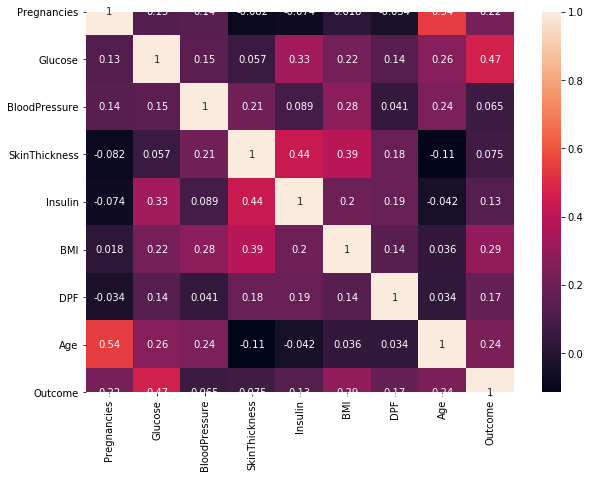

In [133]:
# visualize the correlations using a heatmap
#sns.heatmap(corr, 
#        xticklabels=corr.columns, 
#         yticklabels=corr.columns,annot = True)

plt.figure(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmax=1, square=True, annot=True)


Observation:
In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

In [88]:
# Let's Look no. of people in dataset are diabetic and how many are not using barplot. 
#plt.bar(dataSet.Outcome.count(), dataSet.Outcome, color='g')
#plt.legend()
#plt.xlabel('Outcome')
#plt.ylabel('Count')

#plt.title('Diabetic People Count')

#plt.show()

In [ ]:
# Average age of non-diabetic and diabetic people in the dataset
#plt.bar(dataSet.Age, dataSet.Outcome)

In [94]:
# Let's Look how many of people are diabetic and how many are not as per outcome variable.
# For the data to be able to do good prediction, the ratio between the two segments should not differ drastically


diabetic = len(dataSet.loc[dataSet['Outcome'] == True])
no_diabetic = len(dataSet.loc[dataSet['Outcome'] == False])

print(diabetic)
print(no_diabetic)

print("Number of diabetic cases: {0} ({1:2.2f}%)".format(diabetic, (diabetic / (diabetic + no_diabetic)) * 100 ))
print("Number of no diabetic cases: {0} ({1:2.2f}%)".format(no_diabetic, (no_diabetic / (diabetic + no_diabetic)) * 100))

268
500
Number of diabetic cases: 268 (34.90%)
Number of no diabetic cases: 500 (65.10%)


From the above, we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

### Dataset Preparation (splitting and normalization)

We will use 70% of data for training and 30% for testing.

In [101]:
#from sklearn.model_selection import train_test_split

X = dataSet.drop('Outcome',axis=1)     # Predictor feature columns (8 X m)
Y = dataSet['Outcome']   # Predicted class (1=True, 0=False) (1 X m)

#Split X and y into training and test set in 70:30 ratio
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
# 1 is just any random seed number

In [102]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [103]:
# Verifying the split of the data

print("{}% data is in training set".format((len(X_train)/len(dataSet)) * 100))
print("{}% data is in test set".format((len(x_test)/len(dataSet)) * 100))

69.921875% data is in training set
30.078125% data is in test set


In [105]:
# checking the diabetes True/False ratio in split data

print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(dataSet.loc[dataSet['Outcome'] == 1]), (len(dataSet.loc[dataSet['Outcome'] == 1])/len(dataSet.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(dataSet.loc[dataSet['Outcome'] == 0]), (len(dataSet.loc[dataSet['Outcome'] == 0])/len(dataSet.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 183 (34.08%)
Training Diabetes False Values   : 354 (65.92%)

Test Diabetes True Values        : 85 (36.80%)
Test Diabetes False Values       : 146 (63.20%)



#### Checking of missing values:
As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [106]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


From the above we can see that there are lot of 0 values in the data which we might need to take care of.

In [107]:
# Replacing the zero values with the mean values for the column/attribute

from sklearn.impute import SimpleImputer
replace_zero = SimpleImputer(missing_values=0, strategy="mean")
cols=X_train.columns
X_train = pd.DataFrame(replace_zero.fit_transform(X_train))
x_test = pd.DataFrame(replace_zero.fit_transform(x_test))

X_train.columns = cols
x_test.columns = cols

In [110]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


## Logistic Regression

In [111]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0


In [114]:
#predict on the test data
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [115]:
# Identifying the coefficients

coef_dataSet = pd.DataFrame(model.coef_)
coef_dataSet['intercept'] = model.intercept_
print(coef_dataSet)

         0         1         2        3         4         5         6  \
0  0.12446  0.026332 -0.029373 -0.01231 -0.000083  0.074114  0.347582   

          7  intercept  
0  0.012705  -4.983968  


In [116]:
# Calculating/checking the model scope

model_score = model.score(x_test, y_test)
print(model_score)

0.7792207792207793


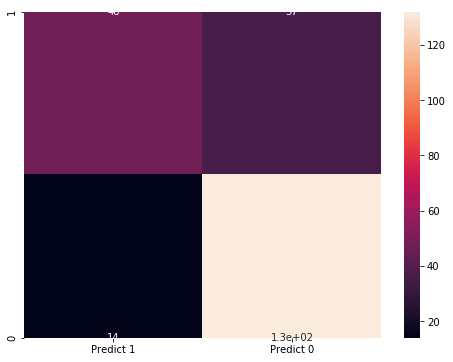

In [122]:
# Plotting a confusion matrix based on the model to analyze the predictions v/s actuals

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

dataSet_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], 
                         columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(dataSet_cm, annot=True)

#### Confusion Matrix Observations/Analysis

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error